<h1 align=center><font size = 5>Data Analysis with Python</font></h1>


# House Sales in King County, USA


This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


You will require the following libraries:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

# Importing Data Sets


Load the csv:


In [9]:
import os
os.chdir("D:\Ritwik's Download\Data Analysis")

In [17]:
df=pd.read_csv("kc_house_data_NaN.csv")
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


We use the method <code>head</code> to display the first 5 columns of the dataframe.


In [18]:
df.drop(["Unnamed: 0", "id", "date"], axis=1, inplace=True)

In [19]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287




**Display the data types of each column using the function dtypes, then take a screenshot and submit it, include your code in the image.**


In [20]:
df.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

**We use the method describe to obtain a statistical summary of the dataframe.**


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21600.0,3.372870,0.926657,1.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21603.0,2.115736,0.768996,0.5000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


**Check the null values**

In [23]:
df.isnull().sum()

price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

# Data Wrangling


We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>


In [24]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code>inplace</code> parameter to <code>True</code>


In [25]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code> inplace </code>  parameter top <code> True </code>


In [26]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [27]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Exploratory Data Analysis




**The unique floor values of the houses present**


In [45]:
fl = df.floors.value_counts()
fl.to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


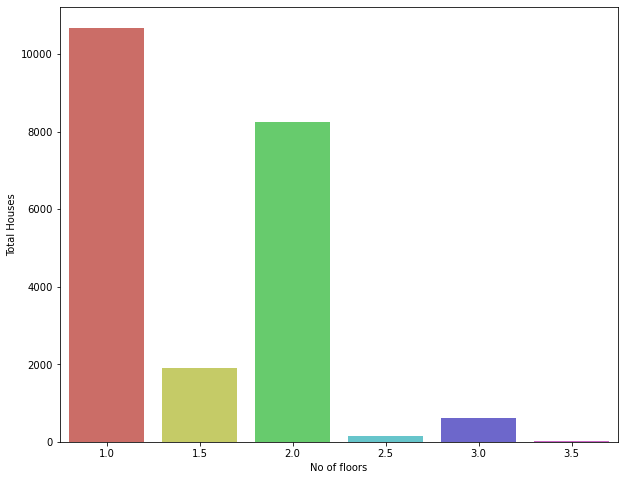

In [46]:
plt.figure(figsize=(10, 8))
sns.barplot(data = df, x = fl.index, y = fl.values, palette="hls")
plt.xlabel("No of floors")
plt.ylabel("Total Houses")
plt.show()



**determine whether houses with a waterfront view or without a waterfront view have more price outliers.**


<AxesSubplot:xlabel='waterfront', ylabel='price'>

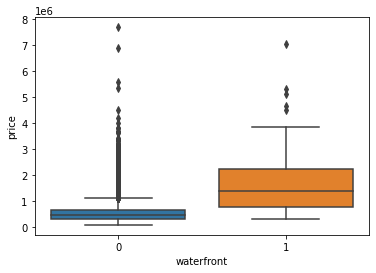

In [43]:
sns.boxplot(data = df, x = "waterfront", y = "price")

- **We can see a waterfront view has the more avg price of house than not a water front view but the without water front view has more outliers**



**determine if the feature <code>sqft_above</code> is negatively or positively correlated with price.**


<AxesSubplot:xlabel='sqft_above', ylabel='price'>

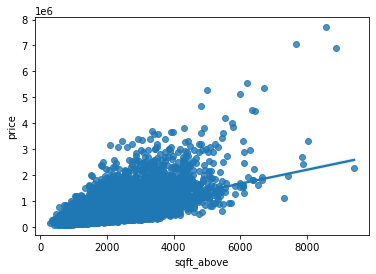

In [49]:
sns.regplot(x=df["sqft_above"], y=df["price"])

- **We can see that the squared above plot has a positive corelation with price**

##### Corelation of proce with other feature

In [47]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

# Model Development



##### Fit a linear regression model to predict the <code>'price'</code> using the list of features:


In [52]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

Create a list of tuples, the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


# Module 5: Model Evaluation and Refinement


Import the necessary modules:


In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets:


In [54]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 4323
number of training samples: 17290


In [55]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit_transform(x_train)
x_train_scale = pd.DataFrame(scale.fit_transform(x_train), columns=x_train.columns, index = x_train.index)
x_train_scale

,floors,waterfront,lat,bedrooms,sqft_basement,view,bathrooms,sqft_living15,sqft_above,grade,sqft_living
7291,-0.913657,-0.088378,-0.406252,-0.395555,1.152282,2.311659,-0.474019,0.287368,-0.480962,-0.559432,0.127706
14835,0.937642,-0.088378,0.653083,-0.395555,-0.661494,-0.306571,0.507247,-0.578250,0.718928,1.146039,0.326877
15880,-0.913657,-0.088378,0.864950,-1.469820,-0.661494,-0.306571,-1.455285,-0.548907,-0.676863,-0.559432,-0.934540
8812,-0.913657,-0.088378,0.271146,0.678709,0.041344,-0.306571,0.180158,1.651817,0.510784,1.146039,0.481788
17220,-0.913657,-0.088378,1.028534,-0.395555,-0.661494,-0.306571,-1.455285,-0.270148,-0.762569,-1.412168,-1.011996
...,...,...,...,...,...,...,...,...,...,...,...
10955,0.937642,-0.088378,-0.042331,-0.395555,-0.661494,-0.306571,0.507247,0.302040,0.167958,0.293304,-0.171051
17289,2.788941,-0.088378,0.921159,0.678709,-0.661494,-0.306571,3.123957,-0.915694,2.004524,1.146039,1.488709
5192,-0.913657,-0.088378,0.244482,-0.395555,0.245394,-0.306571,-0.474019,0.698170,-0.260574,0.293304,-0.115725
12172,-0.913657,-0.088378,1.553877,-0.395555,0.902888,-0.306571,0.180158,-0.636935,-0.603400,-0.559432,-0.104660


In [56]:
x_test_scale = pd.DataFrame(scale.transform(x_test), columns=x_test.columns, index = x_test.index)
x_test_scale

,floors,waterfront,lat,bedrooms,sqft_basement,view,bathrooms,sqft_living15,sqft_above,grade,sqft_living
15544,0.937642,-0.088378,-0.889798,0.678709,-0.661494,-0.306571,0.834336,1.343715,1.233166,1.146039,0.791610
17454,-0.913657,-0.088378,1.209413,-0.395555,0.064016,-0.306571,0.180158,-0.534235,-0.578913,-0.559432,-0.491938
21548,0.937642,-0.088378,-0.759363,-1.469820,-0.661494,-0.306571,-0.801108,2.752178,0.718928,2.851511,0.326877
3427,0.937642,-0.088378,0.731632,0.678709,-0.661494,-0.306571,0.507247,0.683498,0.596490,1.146039,0.216227
8809,0.011992,-0.088378,-0.586410,-0.395555,0.290738,-0.306571,-1.455285,-1.018394,-0.946226,-1.412168,-0.713239
...,...,...,...,...,...,...,...,...,...,...,...
13597,0.937642,-0.088378,-0.050258,0.678709,-0.661494,-0.306571,0.507247,1.945246,2.004524,2.851511,1.488709
9648,0.937642,-0.088378,-1.510986,-0.395555,-0.661494,-0.306571,0.507247,0.390069,0.523027,0.293304,0.149836
18627,0.937642,-0.088378,-1.793475,-0.395555,-0.661494,-0.306571,-0.801108,-0.211462,-0.040186,0.293304,-0.359157
9553,0.937642,-0.088378,-0.043772,1.752974,2.195203,1.002544,1.488513,2.297362,2.726907,1.998775,3.535745


In [57]:
scale.scale_, scale.var_

(array([5.40161196e-01, 8.76931004e-02, 1.38766398e-01, 9.30869404e-01,
        4.41068800e+02, 7.63874885e-01, 7.64318686e-01, 6.81594115e+02,
        8.16741471e+02, 1.17269626e+00, 9.03745404e+02]),
 array([2.91774118e-01, 7.69007985e-03, 1.92561133e-02, 8.66517848e-01,
        1.94541686e+05, 5.83504839e-01, 5.84183054e-01, 4.64570538e+05,
        6.67066630e+05, 1.37521651e+00, 8.16755755e+05]))

In [76]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train_scale,y_train)

In [78]:
predictions = LR.predict(x_test_scale)
predictions

array([300000., 450000., 950000., ..., 250000., 850000., 450000.])

In [79]:
y_test

15544     459000.0
17454     445000.0
21548    1057000.0
3427      732350.0
8809      235000.0
           ...    
13597     965000.0
9648      359950.0
18627     260000.0
9553     1795000.0
14200     418000.0
Name: price, Length: 4323, dtype: float64

In [80]:
Tree_acc_score = metrics.accuracy_score(predictions, y_test)
Tree_acc_score

0.012491325468424705

In [75]:
Tree_f1_score = metrics.f1_score(predictions, y_test)
Tree_f1_score

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

### Question 9

Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.


In [ ]:
from sklearn.linear_model import Ridge

### Question 10

Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2.


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Michelle Carey</a>, <a href="https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Mavis Zhou</a>


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By      | Change Description                           |
| ----------------- | ------- | --------------- | -------------------------------------------- |
| 2022-07-29        | 2.3     | Lakshmi Holla | Added library import |
| 2020-12-01        | 2.2     | Aije Egwaikhide | Coverted Data describtion from text to table |
| 2020-10-06        | 2.1     | Lakshmi Holla   | Changed markdown instruction of Question1    |
| 2020-08-27        | 2.0     | Malika Singla   | Added lab to GitLab                          |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
